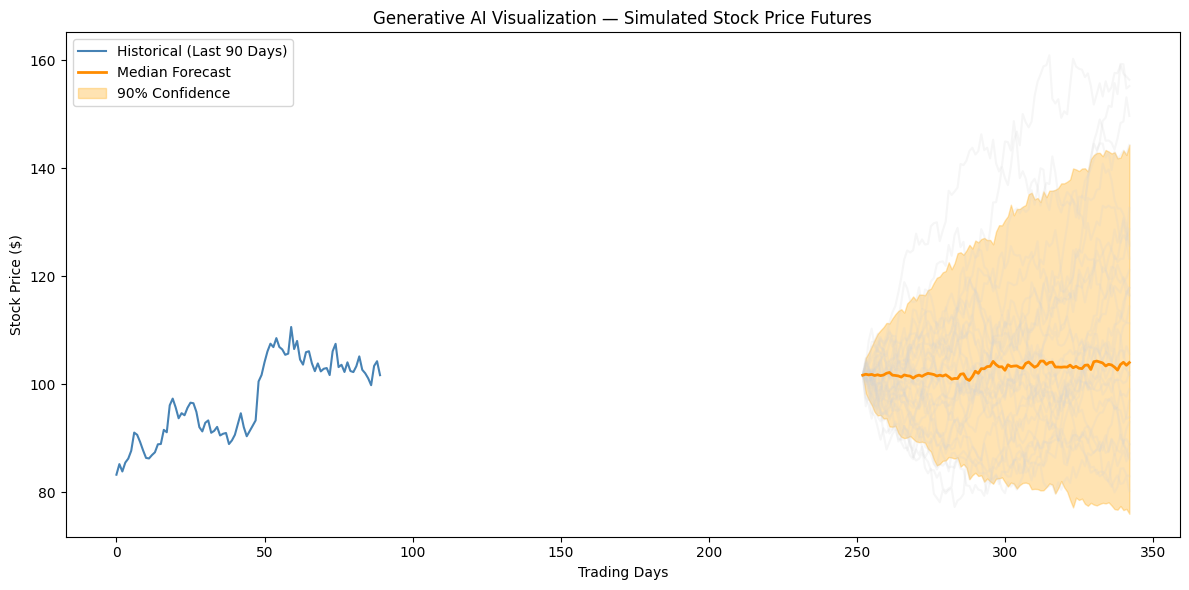

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate a synthetic stock price series (base)
np.random.seed(42)
days = 252  # trading days in a year
price = [100]  # starting price

for i in range(1, days):
    drift = 0.0004   # average daily return
    volatility = 0.02  # daily volatility
    shock = np.random.normal(drift, volatility)
    price.append(price[-1] * (1 + shock))

# Step 2: Generate multiple plausible futures (Monte Carlo style)
n_simulations = 300
future_days = 90
simulated_paths = []

for i in range(n_simulations):
    path = [price[-1]]
    for j in range(future_days):
        drift = 0.0004
        volatility = 0.02
        shock = np.random.normal(drift, volatility)
        path.append(path[-1] * (1 + shock))
    simulated_paths.append(path)

simulated_paths = np.array(simulated_paths)

# Step 3: Calculate median and confidence intervals
median_path = np.median(simulated_paths, axis=0)
lower = np.percentile(simulated_paths, 5, axis=0)
upper = np.percentile(simulated_paths, 95, axis=0)

# Step 4: Visualize the results
plt.figure(figsize=(12,6))
plt.plot(price[-90:], color='steelblue', label='Historical (Last 90 Days)')
for i in range(30):
    plt.plot(range(days, days + future_days + 1), simulated_paths[i], color='lightgray', alpha=0.2)
plt.plot(range(days, days + future_days + 1), median_path, color='darkorange', linewidth=2, label='Median Forecast')
plt.fill_between(range(days, days + future_days + 1), lower, upper, color='orange', alpha=0.3, label='90% Confidence')
plt.title("Generative AI Visualization — Simulated Stock Price Futures")
plt.xlabel("Trading Days")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.tight_layout()
plt.show()
